In [1]:
# Data manipulation
import pandas as pd
import numpy as np
import re

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler


# Clustering
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

# Classification models
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

import pandas as pd
from sklearn.feature_selection import mutual_info_classif, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

# Evaluation metrics
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    f1_score, precision_score, recall_score
)

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_classif, f_classif
from sklearn.ensemble import RandomForestClassifier

# Association rule mining
from mlxtend.frequent_patterns import apriori, association_rules

from sklearn.model_selection import cross_val_score
import numpy as np

In [2]:
# 1. Data Loading and Initial Exploration
df = pd.read_csv("SKILICARSLAN_Anemia_DataSet.csv")

In [3]:
df.head()

,GENDER,WBC,NE#,LY#,MO#,EO#,BA#,RBC,HGB,HCT,...,SDTSD,TSD,FERRITTE,FOLATE,B12,All_Class,HGB_Anemia_Class,Iron_anemia_Class,Folate_anemia_class,B12_Anemia_class
0,1,10.63,6.31,2.79,0.91,0.56,0.06,4.31,12.7,37.6,...,248.90,40.176778,194.00,5.06,178.2,4,0,0,0,1
1,1,5.08,2.50,1.87,0.43,0.26,0.02,4.34,12.8,36.9,...,348.48,33.482553,57.37,9.88,197.7,4,0,0,0,1
2,1,13.68,9.40,2.69,1.55,0.03,0.01,3.18,9.4,27.5,...,357.27,20.144429,114.20,8.37,143.0,4,0,0,0,1
3,1,5.60,3.94,0.83,0.54,0.26,0.03,3.35,10.5,31.4,...,360.60,27.731559,214.20,6.39,139.9,4,0,0,0,1
4,1,3.57,2.03,1.25,0.10,0.18,0.01,1.31,5.1,14.3,...,223.28,78.860623,303.40,4.30,50.0,4,0,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15300 entries, 0 to 15299
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   GENDER               15300 non-null  int64  
 1   WBC                  15300 non-null  float64
 2   NE#                  15300 non-null  float64
 3   LY#                  15300 non-null  float64
 4   MO#                  15300 non-null  float64
 5   EO#                  15300 non-null  float64
 6   BA#                  15300 non-null  float64
 7   RBC                  15300 non-null  float64
 8   HGB                  15300 non-null  float64
 9   HCT                  15300 non-null  float64
 10  MCV                  15300 non-null  float64
 11  MCH                  15300 non-null  float64
 12  MCHC                 15300 non-null  float64
 13  RDW                  15300 non-null  float64
 14  PLT                  15300 non-null  float64
 15  MPV                  15300 non-null 

In [5]:
# 2. Data Cleaning and Preprocessing
print(df.isnull().sum())
# Handle missing values if any (this dataset appears complete)
# df = df.dropna()

GENDER                 0
WBC                    0
NE#                    0
LY#                    0
MO#                    0
EO#                    0
BA#                    0
RBC                    0
HGB                    0
HCT                    0
MCV                    0
MCH                    0
MCHC                   0
RDW                    0
PLT                    0
MPV                    0
PCT                    0
PDW                    0
SD                     0
SDTSD                  0
TSD                    0
FERRITTE               0
FOLATE                 0
B12                    0
All_Class              0
HGB_Anemia_Class       0
Iron_anemia_Class      0
Folate_anemia_class    0
B12_Anemia_class       0
dtype: int64


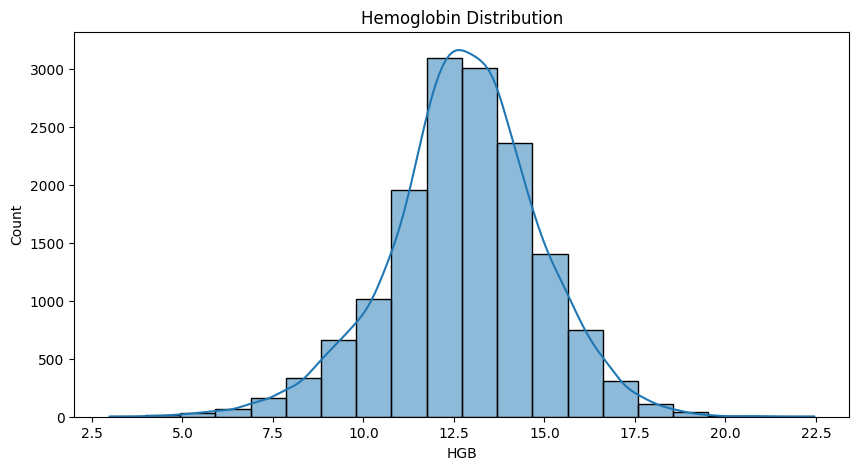

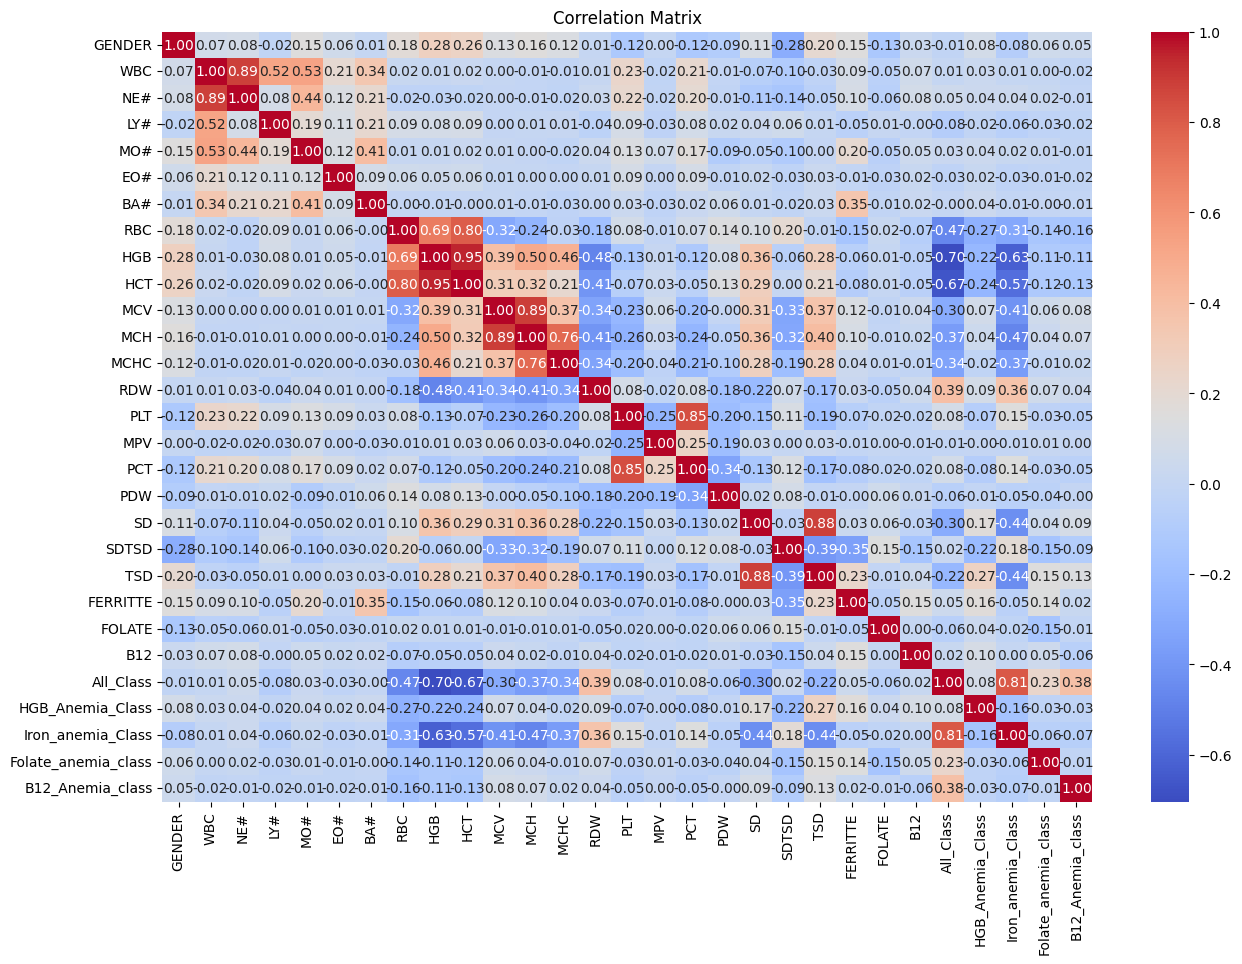

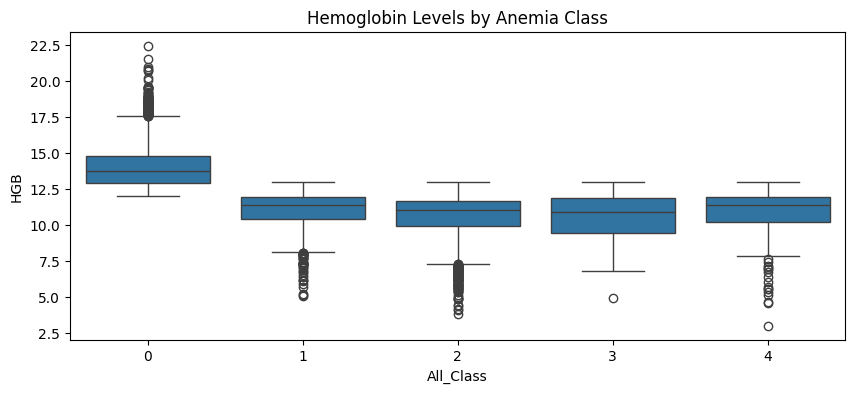

In [6]:
# Plot distributions of key features
plt.figure(figsize=(10,5))
sns.histplot(df['HGB'], kde=True, bins=20)
plt.title('Hemoglobin Distribution')
plt.show()

# Correlation matrix
plt.figure(figsize=(15,10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Boxplots for key markers by anemia class
plt.figure(figsize=(10,4))
sns.boxplot(x='All_Class', y='HGB', data=df)
plt.title('Hemoglobin Levels by Anemia Class')
plt.show()

In [7]:
df.head(15)


,GENDER,WBC,NE#,LY#,MO#,EO#,BA#,RBC,HGB,HCT,...,SDTSD,TSD,FERRITTE,FOLATE,B12,All_Class,HGB_Anemia_Class,Iron_anemia_Class,Folate_anemia_class,B12_Anemia_class
0,1,10.63,6.31,2.790,0.910,0.560,0.060,4.31,12.7,37.6,...,248.90,40.176778,194.00,5.06,178.20,4,0,0,0,1
1,1,5.08,2.50,1.870,0.430,0.260,0.020,4.34,12.8,36.9,...,348.48,33.482553,57.37,9.88,197.70,4,0,0,0,1
2,1,13.68,9.40,2.690,1.550,0.030,0.010,3.18,9.4,27.5,...,357.27,20.144429,114.20,8.37,143.00,4,0,0,0,1
3,1,5.60,3.94,0.830,0.540,0.260,0.030,3.35,10.5,31.4,...,360.60,27.731559,214.20,6.39,139.90,4,0,0,0,1
4,1,3.57,2.03,1.250,0.100,0.180,0.010,1.31,5.1,14.3,...,223.28,78.860623,303.40,4.30,50.00,4,0,0,0,1
5,1,5.93,3.68,1.620,0.470,0.140,0.020,4.01,11.8,35.9,...,275.34,20.897799,573.70,9.70,168.30,4,0,0,0,1
6,1,4.98,3.14,1.320,0.410,0.090,0.020,2.99,9.5,27.1,...,336.40,32.104637,32.22,4.25,160.90,4,0,0,0,1
7,1,9.21,5.60,2.670,0.655,0.239,0.055,4.38,11.5,35.6,...,323.90,21.611609,41.43,5.71,165.50,4,0,0,0,1
8,1,6.68,4.67,0.832,0.530,0.615,0.031,4.25,11.9,36.7,...,236.82,26.737607,98.72,9.01,162.70,4,0,0,0,1
9,1,7.73,4.42,2.350,0.753,0.163,0.044,4.44,11.7,36.1,...,334.05,23.035474,59.59,8.83,80.75,4,0,0,0,1


# Training & Test


In [9]:
X = df[[
    "GENDER", "WBC", "NE#", "LY#", "MO#", "EO#", "BA#", "RBC", "HGB", "HCT",
    "MCV", "MCH", "MCHC", "RDW", "PLT", "MPV","PCT", "PDW", "SD", "SDTSD",
    "TSD", "FERRITTE", "FOLATE", "B12"
]]

# Target columns
y = df[[
    'All_Class'
]]

In [10]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

# Assuming X, y are defined and imported

feature_names = X.columns.tolist()

descriptions = [
    "Gender of the patient (0 for male, 1 for female)",
    "White Blood Cell count (WBC) - Indicator of immune system status",
    "Neutrophil count (#) - A type of white blood cell important in fighting infection",
    "Lymphocyte count (#) - A white blood cell type involved in immune response",
    "Monocyte count (#) - A type of white blood cell that removes pathogens and dead cells",
    "Eosinophil count (#) - Associated with allergic reactions and parasitic infections",
    "Basophil count (#) - Plays a role in immune response and inflammation",
    "Red Blood Cell count (RBC) - Measures oxygen-carrying cells in the blood",
    "Hemoglobin (HGB) - Oxygen-carrying protein in red blood cells",
    "Hematocrit (HCT) - Ratio of red blood cell volume to total blood volume",
    "Mean Corpuscular Volume (MCV) - Average size of red blood cells",
    "Mean Corpuscular Hemoglobin (MCH) - Average amount of hemoglobin per red blood cell",
    "Mean Corpuscular Hemoglobin Concentration (MCHC) - Hemoglobin concentration in red cells",
    "Red Cell Distribution Width (RDW) - Variation in red blood cell size",
    "Platelet count (PLT) - Cell fragments involved in blood clotting",
    "Mean Platelet Volume (MPV) - Average size of platelets",
    "Plateletcrit (PCT) - Volume percentage of platelets in blood",
    "Platelet Distribution Width (PDW) - Variation in platelet size",
    "Standard deviation (SD) - Custom feature, possibly platelet or RBC-related",
    "Standard deviation to SD ratio (SDTSD) - Custom derived metric",
    "Total standard deviation (TSD) - Another derived metric across features",
    "Ferritin level - Indicates iron storage level in the body",
    "Folate (Vitamin B9) level - Essential for DNA synthesis and red blood cell formation",
    "Vitamin B12 level - Required for nerve function and red blood cell production"
]

types = [
    "Categorical", "Numerical", "Numerical", "Numerical", "Numerical", "Numerical", "Numerical",
    "Numerical", "Numerical", "Numerical", "Numerical", "Numerical", "Numerical", "Numerical",
    "Numerical", "Numerical", "Numerical", "Numerical", "Numerical", "Numerical", "Numerical",
    "Numerical", "Numerical", "Numerical"
]

# Feature selection methods
mi_scores = mutual_info_classif(X, y, discrete_features=[0])
f_scores, _ = f_classif(X, y)

rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)
rf_scores = rf.feature_importances_

# Function to build and print a table for a given method
def build_table(scores, method_name):
    df = pd.DataFrame({
        "#": range(1, len(feature_names) + 1),
        "Feature Name": feature_names,
        "Description": descriptions,
        "Type": types,
        method_name: scores
    })
    df = df.sort_values(by=method_name, ascending=False).reset_index(drop=True)
    df["#"] = df.index + 1
    print(f"\n{method_name} Ranking:\n")
    print(df.to_string(index=False))

# Generate and print tables
build_table(mi_scores, "Information Gain")
build_table(f_scores, "ANOVA F-test")
build_table(rf_scores, "Random Forest Importance")



# Normalize the scores using MinMaxScaler
scaler = MinMaxScaler()
normalized_scores = scaler.fit_transform(
    pd.DataFrame({
        "Information Gain": mi_scores,
        "ANOVA F-test": f_scores,
        "Random Forest Importance": rf_scores
    })
)

# Create a DataFrame for normalized scores
normalized_df = pd.DataFrame(
    normalized_scores,
    columns=["Normalized IG", "Normalized ANOVA", "Normalized RF"]
)

# Compute average importance
normalized_df["Average Importance"] = normalized_df.mean(axis=1)

# Combine with feature metadata
final_df = pd.DataFrame({
    "#": range(1, len(feature_names) + 1),
    "Feature Name": feature_names,
    "Type": types
})
final_df = pd.concat([final_df, normalized_df], axis=1)

# Sort by average importance
final_df = final_df.sort_values(by="Average Importance", ascending=False).reset_index(drop=True)
final_df["#"] = final_df.index + 1

# Print the final table
print("\nNormalized & Average Feature Importance Across Methods:\n")
print(final_df.to_string(index=False))



c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Information Gain Ranking:

 # Feature Name                                                                              Description        Type  Information Gain
 1          HGB                            Hemoglobin (HGB) - Oxygen-carrying protein in red blood cells   Numerical          0.555161
 2          HCT                  Hematocrit (HCT) - Ratio of red blood cell volume to total blood volume   Numerical          0.404658
 3          TSD                  Total standard deviation (TSD) - Another derived metric across features   Numerical          0.215650
 4          RBC                 Red Blood Cell count (RBC) - Measures oxygen-carrying cells in the blood   Numerical          0.195888
 5           SD               Standard deviation (SD) - Custom feature, possibly platelet or RBC-related   Numerical          0.159859
 6          MCH      Mean Corpuscular Hemoglobin (MCH) - Average amount of hemoglobin per red blood cell   Numerical          0.156161
 7         MCHC Mean Corpus

### Data Partition

In [11]:
# Feature columns
X = df[[
    "GENDER", "WBC", "NE#", "LY#", "MO#", "EO#", "BA#", "RBC", "HGB", "HCT",
    "MCV", "MCH", "MCHC", "RDW", "PLT", "PCT", "PDW", "SD", "SDTSD",
    "TSD", "FERRITTE", "FOLATE", "B12"
]]

# Target columns
y = df[[
    'All_Class'
]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


=== KNN (k=3) ===


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.8532
F1 Macro: 0.4888
F1 Micro: 0.8532
AUC: 0.8267

=== KNN (k=9) ===


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.8699
F1 Macro: 0.4737
F1 Micro: 0.8699
AUC: 0.9047

=== Decision Tree (Entropy) ===
Accuracy: 0.9991
F1 Macro: 0.9952
F1 Micro: 0.9991
AUC: 0.9960

=== Decision Tree (Gini) ===
Accuracy: 0.9991
F1 Macro: 0.9952
F1 Micro: 0.9991
AUC: 0.9960

=== Naive Bayes ===
Accuracy: 0.8163
F1 Macro: 0.5270
F1 Micro: 0.8163
AUC: 0.9464

=== MLP (1 layer) ===


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9830
F1 Macro: 0.9212
F1 Micro: 0.9830
AUC: 0.9990

=== MLP (2 layers) ===


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9826
F1 Macro: 0.9267
F1 Micro: 0.9826
AUC: 0.9990

=== SVM ===


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9471
F1 Macro: 0.6758
F1 Micro: 0.9471
AUC: 0.9934


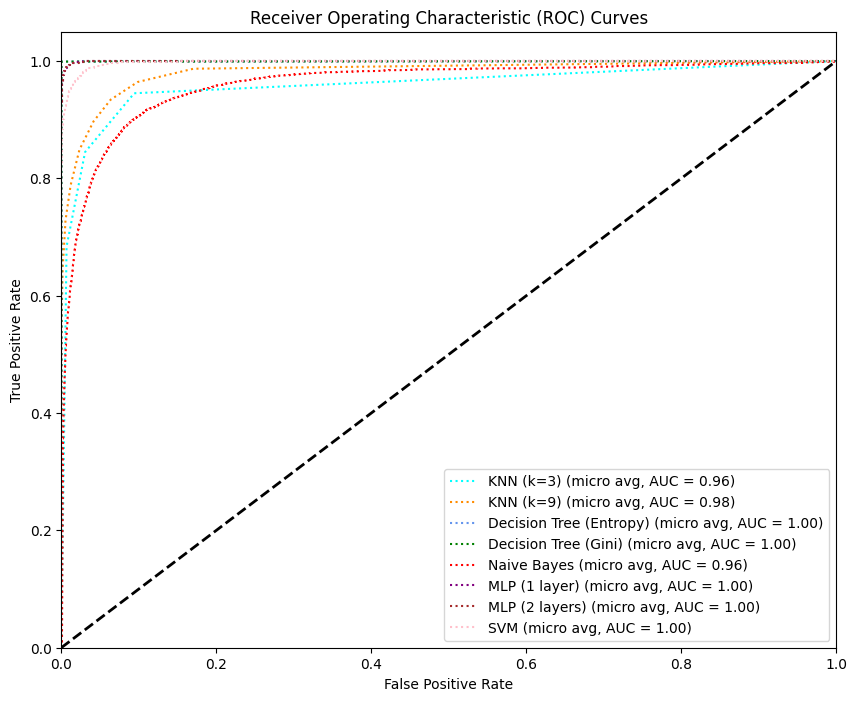


=== Model Comparison ===
Model                     Accuracy   F1 Macro   F1 Micro   AUC       
KNN (k=3)                 0.8532     0.4888     0.8532     0.8267    
KNN (k=9)                 0.8699     0.4737     0.8699     0.9047    
Decision Tree (Entropy)   0.9991     0.9952     0.9991     0.9960    
Decision Tree (Gini)      0.9991     0.9952     0.9991     0.9960    
Naive Bayes               0.8163     0.5270     0.8163     0.9464    
MLP (1 layer)             0.9830     0.9212     0.9830     0.9990    
MLP (2 layers)            0.9826     0.9267     0.9826     0.9990    
SVM                       0.9471     0.6758     0.9471     0.9934    


In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, f1_score, classification_report,
    roc_auc_score, confusion_matrix, roc_curve
)
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

# Standardize the data if needed (for models that benefit from scaling)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize classifiers
classifiers = {
    "KNN (k=3)": KNeighborsClassifier(n_neighbors=3),
    "KNN (k=9)": KNeighborsClassifier(n_neighbors=9),
    "Decision Tree (Entropy)": DecisionTreeClassifier(criterion='entropy', random_state=42),
    "Decision Tree (Gini)": DecisionTreeClassifier(criterion='gini', random_state=42),
    "Naive Bayes": GaussianNB(),
    "MLP (1 layer)": MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='adam',
                      learning_rate_init=0.001, max_iter=1000, random_state=42),
    "MLP (2 layers)": MLPClassifier(hidden_layer_sizes=(10, 10), activation='relu', solver='adam',
                      learning_rate_init=0.001, max_iter=1000, random_state=42),
    "SVM": SVC(random_state=42, probability=True)
}

# Binarize the output for multiclass ROC
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

# Setup plot for ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 
                'purple', 'brown', 'pink', 'gray', 'olive'])

# Dictionary to store metrics
metrics = {}

for name, clf in classifiers.items():
    print(f"\n=== {name} ===")
    
    # Scale data for models that need it
    if name in ["KNN (k=3)", "KNN (k=9)", "SVM", "MLP (1 layer)", "MLP (2 layers)"]:
        clf.fit(X_train_scaled, y_train)
        y_pred = clf.predict(X_test_scaled)
        y_prob = clf.predict_proba(X_test_scaled)
    else:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        y_prob = clf.predict_proba(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average='macro')
    f1_micro = f1_score(y_test, y_pred, average='micro')
    
    # ROC AUC calculation
    if n_classes == 2:
        auc = roc_auc_score(y_test, y_prob[:, 1])
    else:
        auc = roc_auc_score(y_test_bin, y_prob, average='macro', multi_class='ovr')
    
    # Store metrics
    metrics[name] = {
        'accuracy': accuracy,
        'f1_macro': f1_macro,
        'f1_micro': f1_micro,
        'auc': auc
    }
    
    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Macro: {f1_macro:.4f}")
    print(f"F1 Micro: {f1_micro:.4f}")
    print(f"AUC: {auc:.4f}")
    
    # Plot ROC curve
    if n_classes == 2:
        fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
        roc_auc = auc
        plt.plot(fpr, tpr, color=next(colors),
                 label=f'{name} (AUC = {roc_auc:.2f})')
    else:
        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
            roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_prob[:, i])
        
        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
        roc_auc["micro"] = roc_auc_score(y_test_bin, y_prob, average="micro")
        
        plt.plot(fpr["micro"], tpr["micro"],
                 label=f'{name} (micro avg, AUC = {roc_auc["micro"]:.2f})',
                 color=next(colors), linestyle=':')

# Finalize ROC plot
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

# Print metrics comparison
print("\n=== Model Comparison ===")
print("{:<25} {:<10} {:<10} {:<10} {:<10}".format(
    "Model", "Accuracy", "F1 Macro", "F1 Micro", "AUC"))
for name, metric in metrics.items():
    print("{:<25} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f}".format(
        name, metric['accuracy'], metric['f1_macro'], 
        metric['f1_micro'], metric['auc']))


Confusion Matrix: Decision Tree (Entropy)
[[2923    0    0    0    0]
 [   0  294    2    0    0]
 [   0    0 1267    0    0]
 [   0    0    0   42    0]
 [   0    2    0    0   60]]


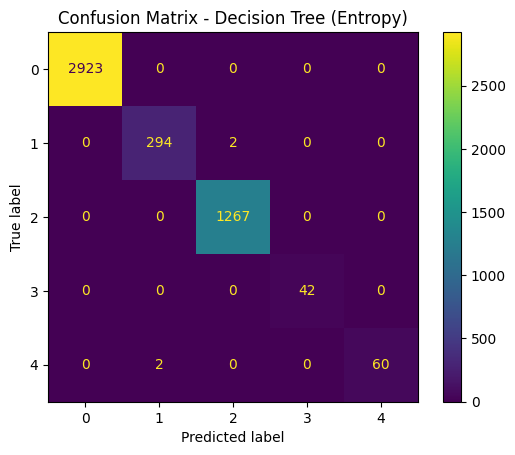


Confusion Matrix: Decision Tree (Gini)
[[2923    0    0    0    0]
 [   0  294    2    0    0]
 [   0    0 1267    0    0]
 [   0    0    0   42    0]
 [   0    2    0    0   60]]


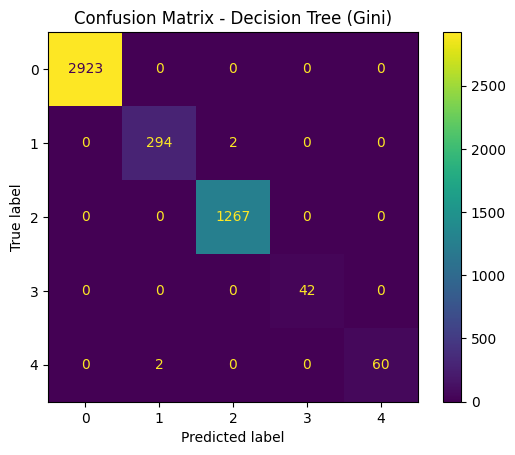

In [13]:
from sklearn.metrics import ConfusionMatrixDisplay

# Get predictions for Decision Tree (Entropy)
dt_entropy = classifiers["Decision Tree (Entropy)"]
dt_entropy.fit(X_train, y_train)
y_pred_entropy = dt_entropy.predict(X_test)
cm_entropy = confusion_matrix(y_test, y_pred_entropy)
print("\nConfusion Matrix: Decision Tree (Entropy)")
print(cm_entropy)
ConfusionMatrixDisplay(confusion_matrix=cm_entropy, display_labels=classes).plot()
plt.title("Confusion Matrix - Decision Tree (Entropy)")
plt.show()

# Get predictions for Decision Tree (Gini)
dt_gini = classifiers["Decision Tree (Gini)"]
dt_gini.fit(X_train, y_train)
y_pred_gini = dt_gini.predict(X_test)
cm_gini = confusion_matrix(y_test, y_pred_gini)
print("\nConfusion Matrix: Decision Tree (Gini)")
print(cm_gini)
ConfusionMatrixDisplay(confusion_matrix=cm_gini, display_labels=classes).plot()
plt.title("Confusion Matrix - Decision Tree (Gini)")
plt.show()


In [27]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
import numpy as np

# Define the models
gini_model = DecisionTreeClassifier(criterion='gini', random_state=42)
mlp_model = MLPClassifier(hidden_layer_sizes=(10, 10), activation='relu', solver='adam',
                          learning_rate_init=0.001, max_iter=100, random_state=42)

# Define selected metrics
scoring = ['accuracy', 'f1_macro', 'f1_micro', 'roc_auc_ovr']

# Perform cross-validation for both models
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Store results
gini_scores = {metric: [] for metric in scoring}
mlp_scores = {metric: [] for metric in scoring}

for metric in scoring:
    # Gini model
    scores = cross_val_score(gini_model, X_train, y_train, cv=cv, scoring=metric)
    gini_scores[metric] = scores

    # MLP model (use scaled data)
    scores = cross_val_score(mlp_model, X_train_scaled, y_train, cv=cv, scoring=metric)
    mlp_scores[metric] = scores

# Print mean scores for reference
print("=== Mean Scores (Gini) ===")
for metric in scoring:
    print(f"{metric}: {np.mean(gini_scores[metric]):.4f}")

print("\n=== Mean Scores (MLP) ===")
for metric in scoring:
    print(f"{metric}: {np.mean(mlp_scores[metric]):.4f}")


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_

=== Mean Scores (Gini) ===
accuracy: 0.9992
f1_macro: 0.9897
f1_micro: 0.9992
roc_auc_ovr: 0.9946

=== Mean Scores (MLP) ===
accuracy: 0.9594
f1_macro: 0.6848
f1_micro: 0.9594
roc_auc_ovr: 0.9918


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [28]:
# Paired t-test and p-value calculation
print("\n=== Statistical Significance (Paired t-tests) ===")
for metric in scoring:
    t_stat, p_value = stats.ttest_rel( gini_scores[metric],mlp_scores[metric])
    significance = "Significant" if p_value < 0.05 else "Not Significant"
    
    print(f"{metric}: t-stat = {t_stat:.4f}, p-value = {p_value:.4f} -> {significance}")



=== Statistical Significance (Paired t-tests) ===
accuracy: t-stat = 17.8886, p-value = 0.0000 -> Significant
f1_macro: t-stat = 13.4642, p-value = 0.0000 -> Significant
f1_micro: t-stat = 17.8886, p-value = 0.0000 -> Significant
roc_auc_ovr: t-stat = 1.1360, p-value = 0.2853 -> Not Significant
